In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# resize images 
img_size = [224,224]
train_path = '/content/drive/MyDrive/thesis dataset/test dataset/train'
valid_path = '/content/drive/MyDrive/thesis dataset/test dataset/test'

In [8]:
#Implementing ResNet built in function within Keras
#Pretrained on ImageNet weights
res = ResNet50(include_top=False, weights= 'imagenet',input_shape= img_size+ [3])

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
for layer in res.layers:
  layer.trainable = False

In [19]:
folders = glob('/content/drive/MyDrive/Thesis/real vs fake/train')

In [20]:
folders

['/content/drive/MyDrive/Thesis/real vs fake/train']

In [21]:
len(folders)

1

In [22]:
x = Flatten()(res.output)
prediction = Dense(2,activation= 'softmax')(x)

#create a model object
model = Model(inputs = res.input, outputs = prediction)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [39]:
#assigning cost/loss function and optimization
#cost/loss function: categorical_crossentropy
#optimizer: adams
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [40]:
#importing images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [41]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Thesis/real vs fake/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Thesis/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15024 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [42]:
#fit the model
f = model.fit_generator(
    training_set, 
    validation_data = test_set,
    epochs = 15,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
470/470 [==============================] - 217s 457ms/step - loss: 0.1006 - accuracy: 0.9744 - val_loss: 0.0288 - val_accuracy: 0.9912
Epoch 2/15
470/470 [==============================] - 215s 456ms/step - loss: 0.0997 - accuracy: 0.9736 - val_loss: 0.0295 - val_accuracy: 0.9905
Epoch 3/15
470/470 [==============================] - 214s 456ms/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 0.0182 - val_accuracy: 0.9947
Epoch 4/15
470/470 [==============================] - 215s 457ms/step - loss: 0.0806 - accuracy: 0.9784 - val_loss: 0.3311 - val_accuracy: 0.9037
Epoch 5/15
470/470 [==============================] - 214s 454ms/step - loss: 0.0484 - accuracy: 0.9838 - val_loss: 0.0163 - val_accuracy: 0.9953
Epoch 6/15
470/470 [==============================] - 214s 455ms/step - loss: 0.0909 - accuracy: 0.9766 - val_loss: 0.0241 - val_accuracy: 0.9940
Epoch 7/15
470/470 [==============================] - 214s 456ms/step - loss: 0.0735 - accuracy: 0.9819 - val_loss: 0.0301 -

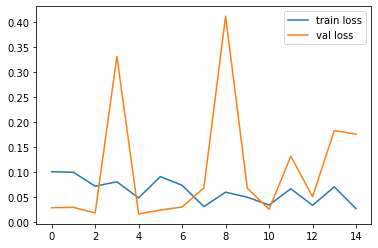

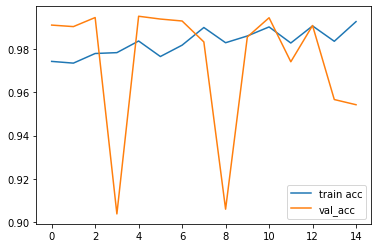

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(f.history['loss'], label='train loss')
plt.plot(f.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(f.history['accuracy'], label = 'train acc')
plt.plot(f.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')